# Create Custom Model Classes - Object-Oriented Programming for Neural Networks

So far, we have created neural networks using `nn.Sequential`, which stacks layers in a fixed order. This works well for simple architectures, but more advanced models require greater flexibility. For example, residual networks use skip connections that add the input of a block to its output, allowing information to bypass layers. To build architectures like that, we need to define our own model classes using Python's object-oriented programming features and PyTorch's `nn.Module`. In this notebook, you will learn how to create classes with attributes and methods, how inheritance allows one class to build on another, and how to use these concepts to define custom neural network models in PyTorch.

## Setup

### Import Libraries

In [1]:
import torch
import torch.nn as nn
from torchviz import make_dot

import numpy as np

## Section 1: Create Classes with Initialized and Inherited Attributes

A class is a blueprint for creating objects that bundle data (attributes) and behavior (methods) together. When you create an instance of a class, Python calls the special `__init__` method to set up the object's initial state. Classes can also inherit from other classes, which means a child class automatically gets all the attributes and methods of its parent class. This is useful for avoiding repetition and building on existing code.

| Code | Description |
| :-- | :-- |
| `class MyClass:`<br>&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self, a = 2):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`self.a = 2` | Define a class named `MyClass` with an `__init__` function that initializes the attribute `a` with a default value of `2`. |
| `my_instance = MyClass()` | Create an instance of `MyClass` named `my_instance`. |
| `my_instance.a` | Access the attribute `a` from the instance `my_instance`. |
| `MyClass(a=10)` | Create an instance of `MyClass` and override the default value by setting `a` to `10`. |
| `class MySubClass(MyClass):`<br>&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self, b = 2):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`super().__init__()`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`self.b = b` | Define a class named `MySubClass` that inherits from `MyClass`. The `super().__init__()` initializes the parent<br>class so that the attribute `a` from the parent class `MyClass` is also initialized for instances of `MySubClass`. |
| `class MySubClass(MyClass):`<br>&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self, b = 2):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`super().__init__(a=25)`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`self.b = b` | Define a class named `MySubClass` that inherits from `MyClass` and overrides the parent's attribute `a`<br>by passing `a=25` to `super().__init__()`. |

#### **Exercises**

Let's say that we want to do an inventory for supermarkets.

Run cell below to define the class `Fruits` that will be used in the exercises of this section.

In [3]:
# define class
class Fruits:
    # initialize attributes
    def __init__(self, num_apples = 10):
        self.num_apples = num_apples

Above, a class named `Fruits` with an attribute named `num_apples` is defined. The `__init__` function initializes the attributes of the class when an instance of the class is created. Here, `num_apples` is given a default value of 10 (which can be overriden).

**Example**: Create an instance of `Fruits` called `aldi_fruits` and access its attribute `num_apples` to check that it's equal to `10`.

In [4]:
# create instance of class
aldi_fruits = Fruits()

# access attribute
aldi_fruits.num_apples

10

Rewe also wants to use the class `Fruits` to create an inventory of its apples.

**Exercise**: Create an instance of `Fruits` called `rewe_fruits` and access its attribute `num_apples`.

The different supermarkets probably don't all have `10` apples. We can override the default value by passing an argument `num_apples` and giving it a different value when creating the instance.

**Exercise**: Create an instance of `Fruits` called `lidl_fruits` with the argument `num_apples = 25`. Access `lidl_fruits`'s attribute `num_apples` to check that it's now equal to 25.

**Hint**: See code reference table.

**Exercise**: Define a class named `Vegetables` that takes `num_carrots` as an argument with a default value of `15`. Create an instance of `Vegetables` called `aldi_vegetables` with `num_carrots` set to `13` and access its attribute `num_carrots` to check that it's equal to `13`.

**Hint**: Look at how the `Fruits` class was defined at the beginning of the section.

**Exercise**: Create a class named `PerishedFruits` with an `__init__` function that takes two arguments: `num_apples = 10` and `num_bad_apples = 2`.

Run the code below to create an instance named `aldi_perished_fruits` (without overriding the default values) and access the attribute `num_bad_apples` from the instance to check that it returns `2`.

In [10]:
# create an instance
aldi_perished_fruits = PerishedFruits()

# access the atribute
aldi_perished_fruits.num_bad_apples

2

Instead of creating a new class that contains both `num_apples` and `num_bad_apples`, we can exploit that we already have a class `Fruits` that has the attribute `num_apples` and inherit from it. That reduces unnecessary repetition and the amount of code we have to write.

**Example**: Define a class named `Perished` that inherits from `Fruits` has one attribute `num_bad_apples = 2`.

In [11]:
class Perished(Fruits):
    def __init__(self, num_bad_apples = 2):
        super().__init__() # initialize the parent class Fruits
        self.num_bad_apples = num_bad_apples

Create an instance named `aldi_perished_fruits` and access the attribute `num_apples` from the class to check that it returns `10`.

In [12]:
# create instance
aldi_perished_fruits = Perished()

# access attribute
aldi_perished_fruits.num_apples

10

**Exercise**: Create a class named `Rotten` that inherits from the class `Vegetables` provided below. `Rotten` should have one attribute `num_bad_carrots = 7`

In [13]:
class Vegetables:
    def __init__(self, num_carrots = 15):
        self.num_carrots = num_carrots

 Create an instance named `aldi_rotten_vegetables` and access the attribute `num_carrots` from the class to check that it returns `15`.

You may have noticed the line `super().__init__()` in the exercise and example above and wondered what it does. It initializes the parent class (`Fruits` and `Vegetables` above) so that its attributes are set when the child class (`Perished` and `Rotten` above) are initialized. 

**Exercise**: Try running the code below where the same `Perished` class is defined and an instance is created but the `super().__init__()` is commented out. What error message do you get when the code attempts to access the attribute `num_apples`?

In [20]:
class Perished(Fruits):
    def __init__(self, num_bad_apples = 2):
        #super().__init__()
        self.num_bad_apples = num_bad_apples

aldi_perished_fruits = Perished()
aldi_perished_fruits.num_apples

AttributeError: 'Perished' object has no attribute 'num_apples'

`super().__init__()` can be also be used to override the values of the attributes in the parent class, not just to initialize them.

**Demo**: Define a class `Rotten` that inherits from the `Vegetables` class defined below. `Rotten` should have one attribute `num_bad_carrots = 7` and override the `num_carrots` attribute inherited from `Vegetables` and sets it to `35`. Create an instance named `rewe_rotten_vegetables` and access the attribute `num_carrots` from the class to check that it returns `35`.

**Hint**: Check code reference to see how arguments are passed to `super().__init__()` .

In [12]:
class Vegetables:
    def __init__(self, num_carrots = 15):
        self.num_carrots = num_carrots

In [13]:
class Rotten(Vegetables):
    def __init__(self, num_bad_carrots = 7):
        super().__init__(num_carrots=35)
        self.num_bad_carrots = num_bad_carrots

rewe_rotten_vegetables = Rotten()
rewe_rotten_vegetables.num_carrots

35

## Section 2: Methods

Methods are functions defined inside a class that operate on instances of that class. They always take `self` as their first argument, which gives them access to the instance's attributes. Like attributes, methods are inherited by child classes, so a subclass can use methods defined in its parent without rewriting them.

| Code | Description |
| :-- | :-- |
| `class MyClass:`<br>&nbsp;&nbsp;&nbsp;&nbsp;`def myclass_method(self):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`print("A method in MyClass")` | Define a class named `MyClass` that has a method named `myclass_method`. |
| `class MyClass:`<br>&nbsp;&nbsp;&nbsp;&nbsp;`def add_two_numbers(self, a, b):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return a + b` | Define a class named `MyClass` that has a method named `add_two_numbers` that returns the sum<br>of the arguments `a` and `b`. |
| `MyClass().some_attribute` | Access the attribute named `some_attribute` from `MyClass`. |
| `MyClass().myclass_method()` | Call `MyClass`'s method `myclass_method` |
| `my_instance = MyClass()` | Create an instance of `MyClass` |
| `my_instance.myclass_method()` | Call `MyClass`'s method `myclass_method` from the instance. |
| `class SubClass(MyClass):`<br>&nbsp;&nbsp;&nbsp;&nbsp;`...` | Define a class named `MySubClass` that inherits from MyClass. This will make inherit the methods of `MyClass`. |
| `my_new_instance = SubClass()`<br>`my_new_instance.myclass_method()` | Create an instance of `SubClass` and call the method `myclass_method`, which is inherited from `MyClass` |

#### **Exercises**


**Example**: Define a class named `Addition` with a method named `add_two_numbers` that takes two arguments `a` and `b` (in addition to `self`) and returns the result of `a + b` when called. Call the method from a class instance with `a=2` and `b=3` to check that it returns `5`.

In [14]:
class Addition:
    def add_two_numbers(self, a, b):
        return a + b
    
Addition().add_two_numbers(a=2,b=3)

5

**Exercise**: Define a class named `Subtraction` with a method named `subtract_two_numbers` that takes two arguments `a` and `b` (in addition to `self`) and returns the result of `a-b` when called. Call the method from a class instance with `a=7` and `b=4` to check that it returns `3`.

**Exercise**: Define a class named `Multiply` with a method named `multiply_two_numbers` that takes two arguments `a` and `b` (in addition to `self`) and returns the result of `a * b` when called. Create an instance of `Multiply` named `multiplication` and call the method `multiply_two_numbers` from  `multiplication`. Set `a=2` and `b=3` to check that it returns `6`.

**Example**: Define a new class named `Addition` with a method named `add_two_numbers` and an `__init__` method where `a` and `b` are set to default values `2` and `7`, respectively. `add_two_numbers` should return the sum of the `a` and `b` set in `__init__`, that is, the result of `self.a + self.b`. 

Call `add_two_numbers` from a class instance with the default values for `a` and `b` to check that it returns `9`.

In [15]:
class Addition:
    def __init__(self, a = 2, b = 7):
        self.a = a
        self.b = b

    def add_two_numbers(self):
        result = self.a + self.b
        return result
    

Addition().add_two_numbers()

9

**Exercise**: Define a new class named `Subtraction` with a method named `subtract_two_numbers` and an `__init__` method where `a` and `b` are set to default values `2` and `7`, respectively. The method `subtract_two_numbers` should return the difference between the values of `a` and `b` set in `__init__`, that is, the result of `self.a - self.b`. 

Call `subtract_two_numbers` from a class instance with the default values for `a` and `b` to check that it returns `-5`.

**Demo**: Methods are also inherited when a subclass inherits from a parent class. Below, a class named `ParentMath` has an `__init__` method for initializing `a` and `b` and the methods `add_two_numbers` and `subtract_two_numbers`. 

A subclass named `MyMath` inherits from `ParentMath`, meaning it inherits its `__init__` and its `add_two_numbers` and `subtract_two_numbers` methods. It adds its own method `multiply_two_numbers`. An instance of `MyMath` will have all methods of `ParentMath` and `MyMath`, as shown below.

In [16]:
class ParentMath:
    def __init__(self, a = 2, b = 7):
        self.a = a
        self.b = b

    def add_two_numbers(self):
        result = self.a + self.b
        return result

    def subtract_two_numbers(self):
        result = self.a - self.b
        return result

In [17]:
class MyMath(ParentMath):
    def multiply_two_numbers(self):
        result = self.a * self.b
        return result
    
# create instance of MyMath and override default values of a and b
math = MyMath(a=5,b=10)
print(f'Arguments of math are a = {math.a} and b = {math.b}')
print(f'Sum of a and b = {math.add_two_numbers()}')
print(f'Difference of a and b = {math.subtract_two_numbers()}')
print(f'Product of a and b = {math.multiply_two_numbers()}')

Arguments of math are a = 5 and b = 10
Sum of a and b = 15
Difference of a and b = -5
Product of a and b = 50


## Section 3: Make Your Own Neural Network Models using PyTorch's `nn.Module`.

PyTorch provides `nn.Module` as a base class for all neural network models. By inheriting from `nn.Module`, your custom model gains access to useful functionality like parameter tracking, saving and loading weights, and moving the model between CPU and GPU. To create a custom model, you define an `__init__` method that sets up the layers and a `forward` method that specifies how data flows through those layers. The `forward` method gives you complete control over the computation, allowing you to implement skip connections, branching paths, or any other architecture you need.

| Code | Description |
| :-- | :-- |
| `class Model(nn.Module)`<br>&nbsp;&nbsp;&nbsp;&nbsp;`...` | Define class named `Model` that inherits from `nn.Module`. |
| `class Model(nn.Module)`<br>&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `super().__init__()` | Define class named `Model` that inherits from `nn.Module`.<br>`super().__init__()` initializes the parent `nn.Module`. |
| `class Model(nn.Module)`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `...` <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `self.fc = nn.Linear(2,2)` | Add a single fully connected (fc) layer with 2 input and 2 output features to the model. |
| `class Model(nn.Module)`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `...` <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `self.fc1 = nn.Linear(1,8)`  <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `self.fc2 = nn.Linear(8,1)` | Add two fully connected layers to the model. One with 1 input feature and 8 output features <br> and one with 8 input features and 1 output feature. |
| `class Model(nn.Module)`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `...` <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `self.relu = nn.ReLU()` | Add a rectified linear unit (ReLU) activation layer in addition to the fully connected layers. |
| `class Model(nn.Module)`<br>&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `...`<br><br>&nbsp;&nbsp;&nbsp;&nbsp;`def forward(self,x):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return self.fc(x)` | Add a method `forward` to the model that carries out the forward pass of the input `x` through the network. |
| `class Model(nn.Module)`<br>&nbsp;&nbsp;&nbsp;&nbsp;`def __init__(self):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `super().__init__()` <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `self.fc = nn.Linear(1,8)`  <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `self.relu = nn.ReLU()`<br><br>&nbsp;&nbsp;&nbsp;&nbsp;`def forward(self,x):`<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `out1 = self.fc(x)` <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `out2 = self.relu(out1)` <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `return out2 + x` | Add a skip connection to the `forward` method. A skip connection adds the input from a few (usually 2-4)<br>layers back to the output from the last layer. |
| `model = Model()` | Create an instance of `Model` and assign it to a variable named `model`. |
| `model.forward(x)` | Do a forward pass of the input tensor `x` through the `model`. |

#### **Exercises**

**Example**: Define a class named `Model` that inherits from the `nn.Module` and is initialized with a single fully connected layer named `fc`[<sup>1</sup>](#fn1) with 1 input feature and 2 output features. Display the model to make sure that it was created correctly.

<span id="fn1"><sup>1</sup>`fc` stands for "fully connected" and is a common abbreviation. It means that all neurons are connected to each other from one layer to the next.

In [18]:
class Model(nn.Module):
    def __init__(self):
        super().__init__() # initializes nn.Module
        self.fc = nn.Linear(1,8)
    
Model()

Model(
  (fc): Linear(in_features=1, out_features=8, bias=True)
)

**Exercise**: Define a class named `Model` that inherits from the `nn.Module` and is initialized with two fully connected layers. The first layer has `2` input features and `16` output features. The second layer has `16` input features and `2` output features. Display the model to make sure that it was created correctly.

**Exercise**: Define a class named `Model` that inherits from the `nn.Module` and is initialized with two fully connected layers and a rectified linear unit (ReLU) layer. The first layer has 6 input features and 32 output features. The second layer has 32 input features and 1 output feature. Display the model to make sure that it was created correctly.

The output when you display it could look like this:
Model(<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(fc1): Linear(in_features=6, out_features=32, bias=True)<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(relu): ReLU()<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(fc2): Linear(in_features=32, out_features=1, bias=True)<br>)

**Note**: The order in which the layers are displayed is not necessarily the same as the order in which the input is passed through the layers in the forward pass.

**Example**: Define a class named `Model` that inherits from the `nn.Module` and is initialized with a two fully connected layers and a ReLU layer. The first fc layer should have 1 input feature and 8 output features. The second fc layer should have 8 input features and 1 output feature. Add a `forward` method to the class that can be used to pass input through the network. The ReLU layer should come between the fully connected layers in the forward pass.

Run the cell with the code to pass the feature `x` through the network using the forward method. The output will just be random numbers because the model is not trained to do anything yet.

In [19]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8,1)

    def forward(self, x):
        out1 = self.fc1(x)
        out2 = self.relu(out1)
        out3 = self.fc2(out2)
        return out3

In [20]:
x = torch.linspace(0,10,11).unsqueeze(1)
Model().forward(x)

tensor([[0.1802],
        [0.2002],
        [0.2382],
        [0.2762],
        [0.3142],
        [0.3522],
        [0.3902],
        [0.4178],
        [0.4425],
        [0.4802],
        [0.5188]], grad_fn=<AddmmBackward0>)

**Exercise**: Add a `forward` method to the class defined below. The ReLU layer should come after the fully connected layer in the forward pass.

**Hint**: See example above and code reference table.

In [21]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,2)
        self.relu = nn.ReLU()

Run the cell with the code to pass the feature `x` through the network using the forward method. The output will just be random numbers because the model is not trained to do anything yet.

In [ ]:
x = torch.linspace(0,10,11).unsqueeze(1)
Model().forward(x)

tensor([[0.5705, 0.5370],
        [0.4716, 0.1446],
        [0.3727, 0.0000],
        [0.2739, 0.0000],
        [0.1750, 0.0000],
        [0.0761, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)

**Exercise**: Add a `forward` method to the class defined below. The ReLU layer should come **first** - before the fully connected layers - in the forward pass.

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(11,2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2,11)

Run the cell below with the code to pass the feature `x` through the network using the forward method. The output will just be random numbers because the model is not trained to do anything yet.

In [31]:
x = torch.linspace(0,10,11)
Model().forward(x)

tensor([-0.8617,  1.9368, -1.8584, -0.1854,  1.4047, -2.1951, -0.5031, -3.2277,
        -2.6448, -2.0686, -2.8483], grad_fn=<ViewBackward0>)

**Exercise**: Add a `forward` method to the class defined below. The ReLU layer should come between the fully connected layers and the Sigmoid layer should come last in the forward pass.

In [32]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,2)
        self.fc2 = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

Run the cell with the code to pass the feature `x` through the network using the forward method. The output will just be random numbers because the model is not trained to do anything yet, but they should all be between `0` and `1`.

In [ ]:
x = torch.linspace(0,10,11).unsqueeze(1)
Model().forward(x)

**Extra Challenge**: Add a `forward` method to the class defined below. The ReLU layer should come between the fully connected layers and the input `x` should be added to the output from the last fully connected layer. This is called a skip connection and is a way to deal with the problem of vanishing gradients.

In [22]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(11,2)
        self.fc2 = nn.Linear(2,11)
        self.relu = nn.ReLU()

Run the cell with the code to pass the feature `x` through the network using the forward method. The output will just be random numbers because the model is not trained to do anything yet.

In [36]:
x = torch.linspace(0,10,11)
Model().forward(x)

tensor([ 0.4574, -0.0229,  2.9956,  4.1997,  6.8269,  3.4682,  5.2284,  7.8946,
         8.7787,  6.6819,  8.8608], grad_fn=<AddBackward0>)

## Section 4: Visualize Network with `torchviz`

When building neural networks, it can be helpful to visualize the computational graph that PyTorch constructs during the forward pass. The `torchviz` library provides a simple way to generate these visualizations, showing how tensors flow through operations and how gradients will propagate during backpropagation. This is particularly useful for verifying that your model architecture is correct, especially when working with skip connections or other non-sequential elements.

| Code | Description |
| :-- | :-- |
| `output = model(x)` | Pass input `x` through the model to get an output tensor. |
| `make_dot(output)` | Create a visualization of the computational graph for `output`. |
| `make_dot(output, params=dict(model.named_parameters()))` | Create a visualization that labels model parameters by name. |
| `make_dot(output).render("graph", format="png")` | Save the visualization as a PNG file named `graph.png`. |
| `dot = make_dot(output)`<br>`dot.graph_attr['rankdir'] = 'LR'` | Change the graph direction to left to right (horizontal) instead of top to bottom. |

#### **Exercises**

**Example**: Visualize the computational graph of a simple model with one linear layer. First, define the model, pass an input through it, then use `make_dot` to visualize how the output was computed.

In [25]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(3, 2)
    
    def forward(self, x):
        return self.fc(x)

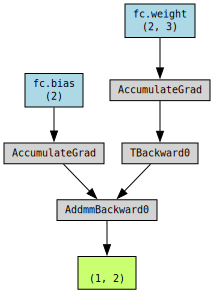

In [26]:
model = Model()
x = torch.randn(1, 3)
output = model(x)

make_dot(output, params=dict(model.named_parameters()))

**Exercise**: Visualize the computational graph of a the model defined below, which has two linear layers and a ReLU activation between them.

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 2)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


**Exercise**: Visualize a model with a skip connection. Compare the graph to the previous exercise. Where do you thing the skip connection appears in the visualization?

In [11]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 4)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4, 4)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out + x  # skip connection